In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.gridspec import GridSpec

In [52]:
# -- load the data -- 
std= pd.read_excel(r'/Users/Rushaner/Desktop/Proyecto/Copy of modelo_tidy_estudiantes_actualizado.xlsx', index_col= None)
std.head(20)

# -- tranform the data nota from a range of 100 to a range of 10 -- 
std['nota']= std['nota']/10
std.isna().sum()
std.head()

,id_estudiante,nombre_estudiante,area,asignatura,aula 1,nota,fecha
0,1,Ana Pérez,Ciencias,Física,Aula 1,8.5,2025-09-01
1,1,Ana Pérez,Ciencias,Química,Aula 1,9.0,2025-09-01
2,1,Ana Pérez,Ciencias,Biología,Aula 1,8.8,2025-09-01
3,1,Ana Pérez,Matemáticas,Álgebra,Aula 1,9.5,2025-09-01
4,1,Ana Pérez,Matemáticas,Geometría,Aula 1,9.2,2025-09-01


['Ana Pérez', 'Luis Martínez', 'Paula Rodríguez', 'Andrés Castillo', 'Valeria Gómez', 'Roberto Fernández', 'Elena Morales', 'Gabriel Herrera', 'Isabel Cruz', 'Santiago López', 'Mariana Torres']


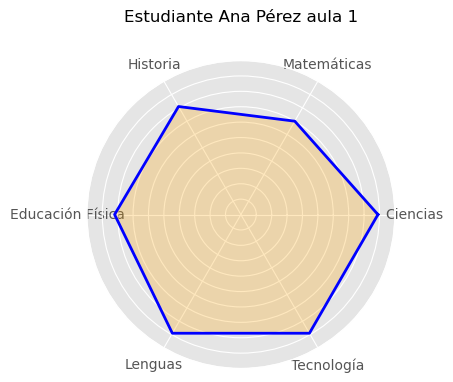

In [3]:
# Selecting the  unique fields and lectures from the data 

skill_fd= list(std['area'].unique())
skill_lt= list (std['asignatura'].unique())

# -- Selecting the name of the stundets -- 
name_std= list (std['nombre_estudiante'].unique())

# -- lenning the the variables _ fd and _lt to compute the angle
l_skill_fd= len(skill_fd)
l_skill_lt= len(skill_lt)

# filter by name and get the average grades fo each field 

std_1= std[std['nombre_estudiante']== 'Luis Martínez']
std_2= std_1.groupby(['nombre_estudiante','area'], as_index= False) ['nota'].mean().round(1) #

# enlist the "nota"
nota= list(std_2['nota'])

# Compute angle for each skill 

angles= np.linspace (0, 2 * np.pi, l_skill_fd, endpoint= False).tolist()
nota += nota[:1] # close the circle
angles += angles[:1]
nota += nota[:1]
nota += nota[:1]

# ___ plot___
plt.style.use('ggplot')
fig, ax= plt.subplots(figsize= (4,4), subplot_kw= dict(polar= True))

ax.plot(angles, nota, color= 'blue', linewidth= 2)
ax.fill(angles, nota, color= 'orange', alpha= 0.25)


ax.set_yticks(range(1,11))
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(skill_fd)

plt.title('Estudiante Ana Pérez aula 1', size= 12, y = 1.1)
print(name_std)

In [ ]:
def chart(df,name,cat, grade, col_name):
    """Esta funcion crea un grafico de radar para visualizar
    de manera mas intuitiva las habilidades del estudiante"""
    
    # selecting and lenning the unique values from the column cat;
    skill_ct= list(df[cat].unique())
    l_skill_ct = len(skill_ct)
    
    #filter the data frame by the name of the student
    df1= df[df[col_name] == name]
    df1= df1.groupby( [col_name ,cat], as_index= False)[grade].mean().round(1)
    
    #listing the grade 
    nota = list(df1[grade])
    
    #compute the angles 
    
    angle= np.linspace(0,2 *np.pi, l_skill_ct, endpoint= False).tolist()
    nota += nota[:1]
    angle += angle[:1]
    
    while len(nota) != len(angle):
        if len(angle) > len(nota):
            nota += nota[:1] #close the angle
        elif len(nota)> len(angle):
            nota -=nota[:1]
    
    # -- plot -- 
    plt.style.use('ggplot')
    
    fig, ax = plt.subplots(figsize= (4,4), subplot_kw= dict(polar= True)) #create the figure 
    
    ax.plot(angle, nota, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
    ax.fill(angle, nota, color= 'orange', alpha= 0.2)
    
    #set the ticks labes 
    ax.set_yticks(range(1,11))
    ax.set_yticklabels([])
    ax.set_xticks(angle[:-1])
    ax.set_xticklabels(skill_ct)
    plt.title (f'Estudiante {name} del Aula 1')

    return ax   
    

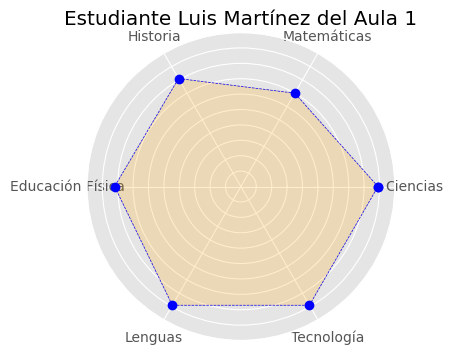

In [5]:
chart(std, name= 'Luis Martínez', cat = 'area', col_name= 'nombre_estudiante', grade= 'nota')
plt.show()

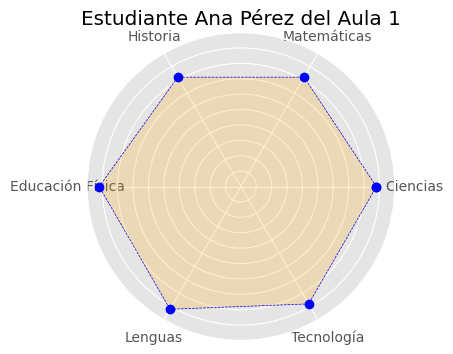

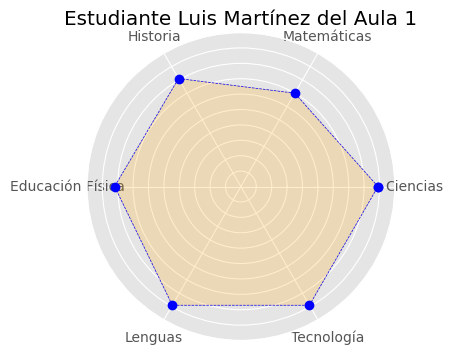

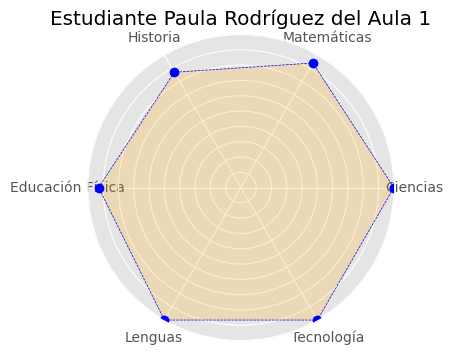

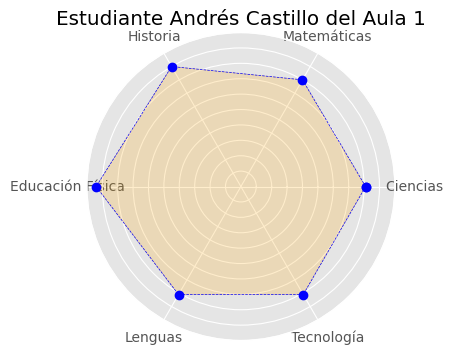

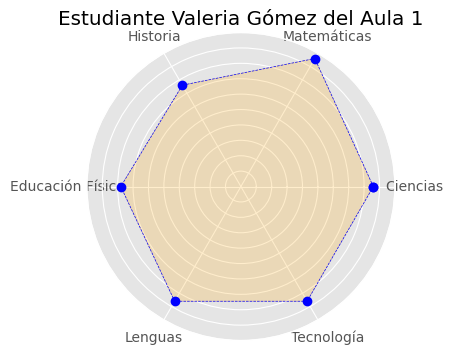

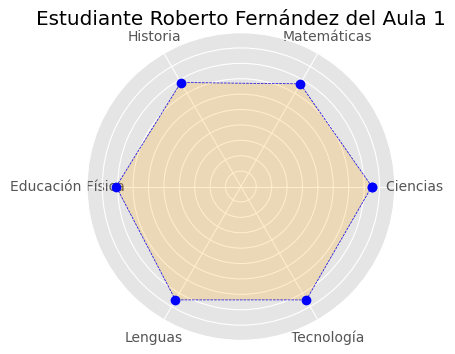

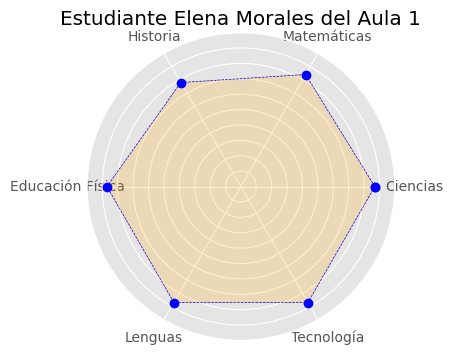

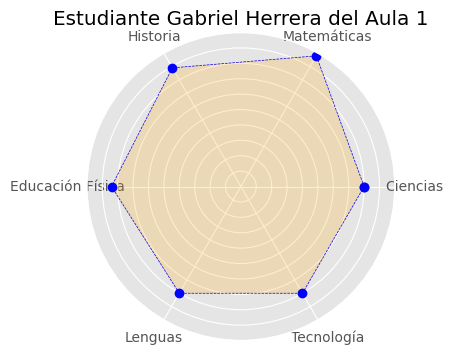

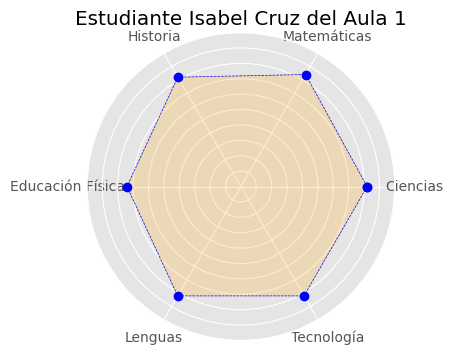

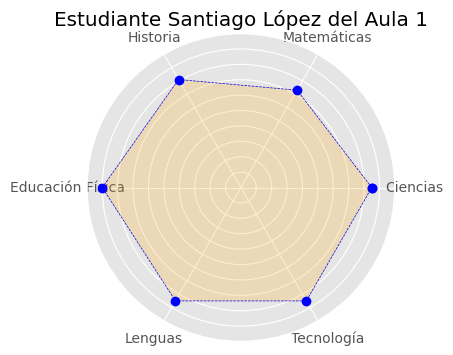

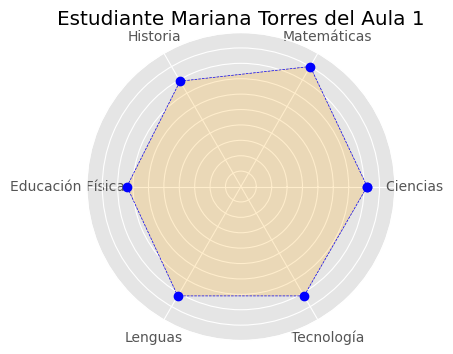

In [6]:
for i in name_std:
    chart(std, name= i, cat= 'area', col_name= 'nombre_estudiante', grade= 'nota')
    plt.show()

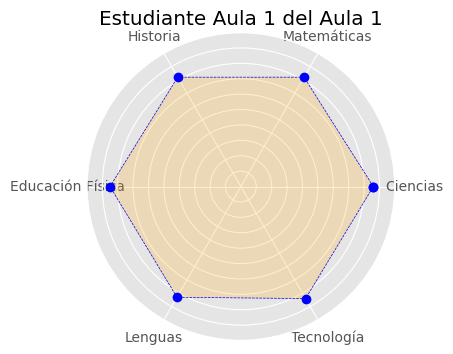

In [7]:
chart(std, name= 'Aula 1', cat= 'area', grade= 'nota', col_name= 'aula 1 ')
plt.show()

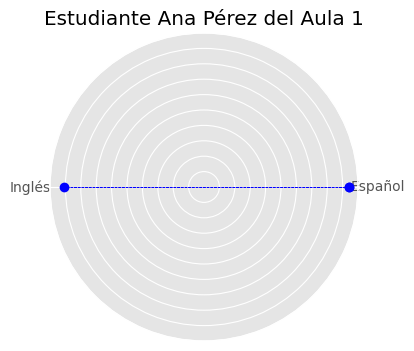

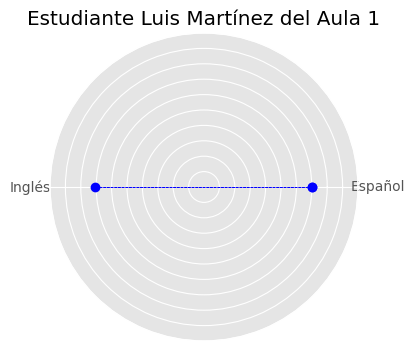

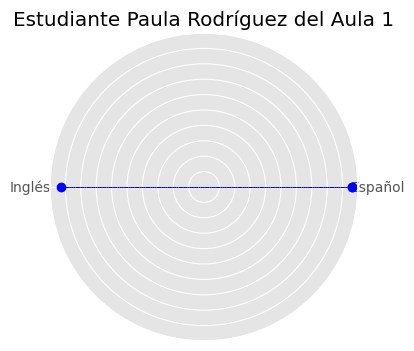

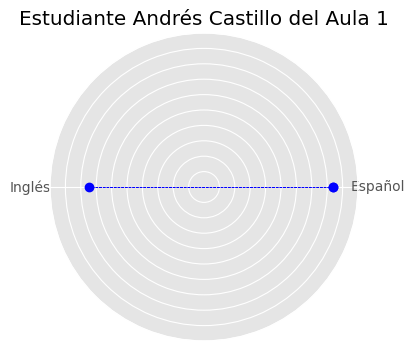

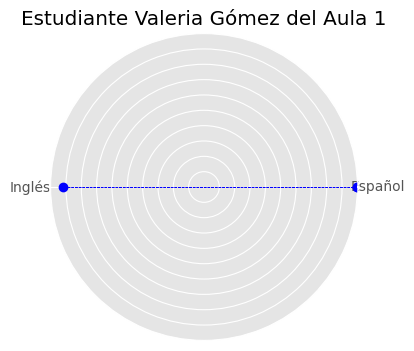

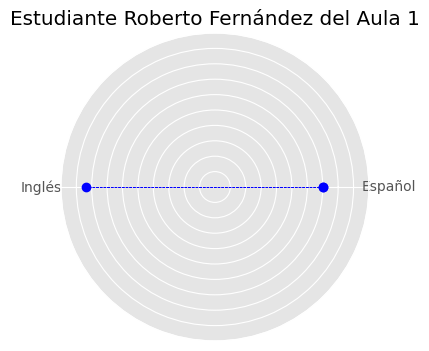

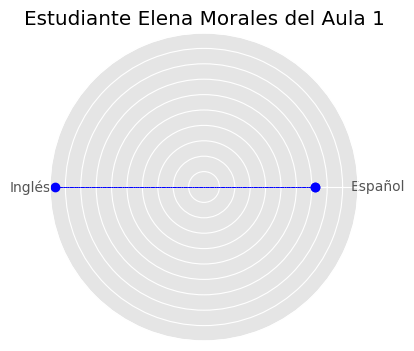

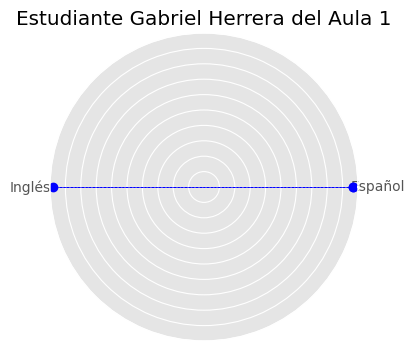

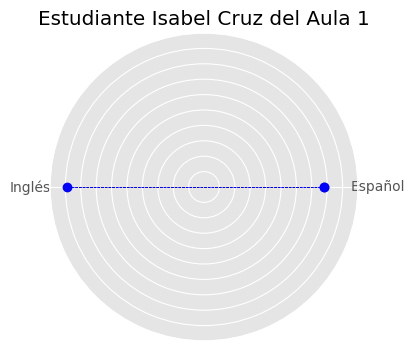

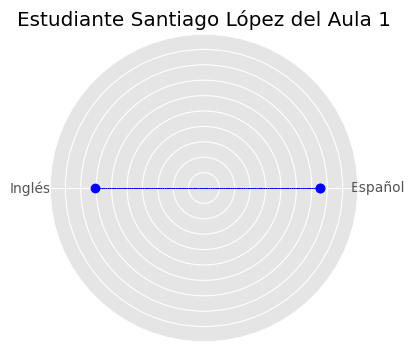

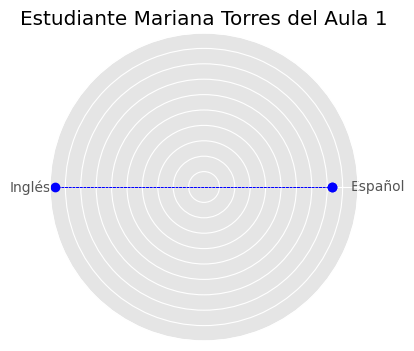

In [8]:
# group the data frame by areas 
std_lenguas = std[std['area'] == 'Lenguas']
for i in name_std:
    chart(std_lenguas, name= i, cat= 'asignatura', grade= 'nota', col_name= 'nombre_estudiante')
    plt.show()




In [36]:
def seg(df,name,cat, grade, col_name):
    """Esta funcion crea un grafico de radar para visualizar
    de manera mas intuitiva las habilidades del estudiante"""
    
    # selecting and lenning the unique values from the column cat;
    skill_ct= list(df[cat].unique())
    l_skill_ct = len(skill_ct)
    
    #filter the data frame by the name of the student
    df1= df[(df[col_name] == name)]
    df1= df1.groupby( [col_name ,cat], as_index= False)[grade].mean().round(1)
    
    #listing the grade 
    nota = list(df1[grade])
    
    #compute the angles 
    
    angle= np.linspace(0,2 *np.pi, l_skill_ct, endpoint= False).tolist()
    nota += nota[:1]
    angle += angle[:1]
    
        # check the variables 
    if len(nota) == 0 or len(angle) == 0:
        print("⚠️ Error: nota o angle están vacíos")
    else:
        # exective if all of them have values
        while len(nota) != len(angle):
            if len(angle) > len(nota):
                nota += nota[:1]
            elif len(nota) > len(angle):
                nota = nota[:len(angle)]
            
    return angle, nota, skill_ct
    

In [ ]:
def chat2(df,name,grade, cl_name, cat, asg, aula ):
    # Selecting and counting the unique values from the column 'area'
    skill_ct = list(df[cat].unique())
    l_skill_ct = len(skill_ct)

    # Filter the dataframe by the student's name
    df1 = df[(df[cl_name] == name) & (df["aula"] == aula)]
    df1 = df1.groupby([cl_name, cat], as_index=False)[ grade].mean().round(1)

    # Listing the grades
    nota = list(df1[grade])

    # Compute the angles
    angle = np.linspace(0, 2 * np.pi, l_skill_ct, endpoint=False).tolist()

    # Close the circle
    nota += nota[:1]
    angle += angle[:1]

    # Adjust lengths in case they differ
    while len(nota) != len(angle):
        if len(angle) > len(nota):
            nota += nota[:1]  # close the angle
        elif len(nota) > len(angle):
            nota = nota[:len(angle)]

    # Set the style of the chat
    plt.style.use("ggplot")
    
    fig = plt.figure( figsize= (20,12)) # Create the figure where all the grafic will be layout 

    #Select the part of the fig, it's worked as a arrays
    fig_g= GridSpec(4,6, figure= fig)
    ax1= fig.add_subplot(fig_g[1:3, 2:4], polar= True)
    ax2= fig.add_subplot(fig_g[1,0],polar= True)
    ax3= fig.add_subplot(fig_g[2,1],polar= True)
    ax4= fig.add_subplot(fig_g[3,0],polar= True)
    ax5= fig.add_subplot(fig_g[1,5],polar= True)
    ax6= fig.add_subplot(fig_g[2,4],polar= True)
    ax7= fig.add_subplot(fig_g[3,5],polar= True)

    #Plot the first chat and the principal 
    ax1.plot(angle, nota, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
    ax1.fill(angle, nota, color= 'orange', alpha= 0.2)
        
        #set the ticks labes 
    ax1.set_yticks(range(1,11))
    ax1.set_yticklabels([])
    ax1.set_xticks(angle[:-1])
    ax1.set_xticklabels(skill_ct, fontsize= 8)
    ax1.tick_params(axis='x', pad=8)
    ax1.set_title (f'Estudiante {name} del {aula}', pad= 25, fontsize= 16)

    #Filter the df by one of the area
    df2= df[df[cat]== "Historia"]
    #Check if the values name is in df 
    if name is df2[cl_name].values:
        angle_2, nota_2, skill_as2 = seg(df2, name= name ,
                                         cat= asg ,
                                         col_name= cl_name,
                                         grade= grade 
                                         ) #this function return the values to compute the data
        
        #Plot the chat 
        ax2.plot(angle_2, nota_2, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
        ax2.fill(angle_2, nota_2, color= 'orange', alpha= 0.2)
            
            #set the ticks labes 
        ax2.set_yticks(range(1,11))
        ax2.set_yticklabels([])
        ax2.set_xticks(angle_2[:-1])
        ax2.set_xticklabels(skill_as2, rotation= 45)
        ax2.tick_params(axis='x', pad=8)
        ax2.set_title (f'Campo de Historia', pad= 25)
    else: 
        ax2.set_title (f'Campo de Historia', pad= 25)
        pass #jump to the othe line of code if the name is not on df 


    df3= df[df['area'] == "Matemáticas"]
    #Check if the values name is in df 
    if name is df2[cl_name].values:
        angle_3, nota_3, skill_as3= seg(df3, name= "Ana Pérez",
                                        cat= 'asignatura',
                                        col_name= 'nombre_estudiante',
                                        grade= 'nota'
                                        )
        ax3.plot(angle_3, nota_3, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
        ax3.fill(angle_3, nota_3, color= 'orange', alpha= 0.2)
            
            #set the ticks labes 
        ax3.set_yticks(range(1,11))
        ax3.set_yticklabels([])
        ax3.set_xticks(angle_3[:-1])
        ax3.set_xticklabels(skill_as3)
        ax3.tick_params(axis='x', pad=8)
        ax3.set_title (f'Campo de Matematicas', pad= 35)
    else:
        ax3.set_title(f'Campo de Matematicas', pad= 35)
        pass

    #Filte the dataframe
    df4= df[df['area'] == "Ciencias"]

    if name is df2[cl_name].values:
        #Get the variable from the seg function 
        angle_4, nota_4, skill_as4= seg(df4, name= name,
                                        cat= asg,
                                        col_name= cl_name,
                                        grade= grade
                                        )
        #set the plot 
        ax4.plot(angle_4, nota_4, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
        ax4.fill(angle_4, nota_4, color= 'orange', alpha= 0.2)
            
            #set the ticks labes 
        ax4.set_yticks(range(1,11))
        ax4.set_yticklabels([])
        ax4.set_xticks(angle_4[:-1])
        ax4.set_xticklabels(skill_as4)
        ax4.tick_params(axis='x', pad=8)
        ax4.set_title (f'Campo de Ciencias', pad= 35)
    else: 
        ax4.set_title (f'Campo de Ciencias', pad= 35)
        pass

    #filter the dataframe
    df5= df[df['area'] == "Tecnología"]

    if name in df5[cl_name].values:

        angle_5, nota_5, skill_as5 = seg(df5, name= name,
                                        cat= asg,
                                        col_name= cl_name,
                                        grade= grade
                                        )
        ax5.plot(angle_5, nota_5, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
        ax5.fill(angle_5, nota_5, color= 'orange', alpha= 0.2)
            
            #set the ticks labes 
        ax5.set_yticks(range(1,11))
        ax5.set_yticklabels([])
        ax5.set_xticks(angle_5[:-1])
        ax5.set_xticklabels(skill_as5)
        ax5.tick_params(axis='x', pad=8)
        ax5.set_title (f'Campo de Tecnologia', pad= 35)
    else:
        pass

    #filter the dataframe
    df6= df[df['area'] == "Lenguas"]

    #check if the name of the student is in the df
    if name in df6[cl_name].values:

        angle_6, nota_6, skill_as6 = seg(df6, name= name,
                                        cat= asg,
                                        col_name= cl_name,
                                        grade= grade
                                        )
        ax6.plot(angle_6, nota_6, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
        ax6.fill(angle_6, nota_6, color= 'orange', alpha= 0.2)
            
            #set the ticks labes 
        ax6.set_yticks(range(1,11))
        ax6.set_yticklabels([])
        ax6.set_xticks(angle_6[:-1])
        ax6.set_xticklabels(skill_as6)
        ax6.tick_params(axis='x', pad=8)
        ax6.set_title (f'Campo de Lenguas', pad= 15)
    else:
        pass

    #filter the dataframe 
    df7= df[df['area'] == "Educación Fisica"]

    #check if the name of the student is in the df
    if name in df6[cl_name].values:

        angle_7, nota_7, skill_as7 = seg(df7, name= name,
                                        cat= asg,
                                        col_name= cl_name,
                                        grade= grade
                                        )
        ax7.plot(angle_7, nota_7, color = 'blue', linewidth= 0.5, linestyle = "--", marker= 'o') #plot the fig 
        ax7.fill(angle_7, nota_7, color= 'orange', alpha= 0.2)
            
            #set the ticks labes 
        ax7.set_yticks(range(1,11))
        ax7.set_yticklabels([])
        ax7.set_xticks(angle_7[:-1])
        ax7.set_xticklabels(skill_as7)
        ax7.tick_params(axis='x', pad=8)
        ax7.set_title (f'Campo de Educación Fisica', pad= 15)
    else:
        ax7.set_title (f'Campo de Educación Fisica', pad= 15)
        pass
        

In [40]:
df5= std[std['area'] == "Tecnología"]
df5.columns

Index(['id_estudiante', 'nombre_estudiante', 'area', 'asignatura', 'aula 1 ',
       'nota', 'fecha'],
      dtype='object')

In [46]:
df6= std[std['area'] == "Lengua"]
df6

,id_estudiante,nombre_estudiante,area,asignatura,aula 1,nota,fecha


In [41]:
df5.groupby( ['nombre_estudiante','asignatura'], as_index= False)['nota'].mean().round(1)

,nombre_estudiante,asignatura,nota
0,Andrés Castillo,Informática,10.0
1,Andrés Castillo,Robótica,8.9
2,Elena Morales,Informática,9.6
3,Elena Morales,Robótica,7.8
4,Gabriel Herrera,Informática,8.5
5,Gabriel Herrera,Robótica,8.2
6,Isabel Cruz,Informática,7.3
7,Isabel Cruz,Robótica,7.4
8,Luis Martínez,Informática,8.4
9,Luis Martínez,Robótica,7.9
